In [1]:
import pandas as pd

In [2]:
def data_aggregator(path,columnnumber,chunksize):
    df_list = []
    for chunk in pd.read_csv(path,usecols=columnnumber, chunksize=chunksize):
        df_list.append(pd.DataFrame(chunk))
    result = pd.concat(df_list)
    del df_list
    result1=result.fillna(value=0)
    del result
    return result1

In [3]:
import requests
from bs4 import BeautifulSoup
page = requests.get("https://github.com/CriMenghini/ADM-2018/blob/master/Homework_2/taxi_zone_lookup.csv")
soup = BeautifulSoup(page.content, 'html.parser')
ids=[]
bor=[]
zon=[]
srv_zon=[]
cell=0
for i in range(2,1327,5):    #FIRSTLY We get all the location ids
    a=soup.find_all('td')[i].get_text()  
    ids.append(a)
    cell=cell+1
    
cell=0
for i in range(3,1328,5):    #Then all the boroughs
    a=soup.find_all('td')[i].get_text()
    bor.append(a)
    cell=cell+1
    
cell=0
for i in range(4,1329,5):   #After that we get al zones
    a=soup.find_all('td')[i].get_text()
    zon.append(a)
    cell=cell+1
cell=0
for i in range(5,1330,5):    #Finally we get all the seving zones
    a=soup.find_all('td')[i].get_text()
    srv_zon.append(a)
    cell=cell+1
# after getting all the informations needed we merged all the lists together
data_tuples = list(zip(ids,bor,zon,srv_zon))

In [4]:
boroghFrame=pd.DataFrame(data_tuples,columns = ["PULocationID", "Borogh", "Zone", "srv_zon"])
boroghFrame['PULocationID']=boroghFrame['PULocationID'].apply(int)

In [5]:
boroghFrame

,PULocationID,Borogh,Zone,srv_zon
0,1,EWR,Newark Airport,EWR
1,2,Queens,Jamaica Bay,Boro Zone
2,3,Bronx,Allerton/Pelham Gardens,Boro Zone
3,4,Manhattan,Alphabet City,Yellow Zone
4,5,Staten Island,Arden Heights,Boro Zone
5,6,Staten Island,Arrochar/Fort Wadsworth,Boro Zone
6,7,Queens,Astoria,Boro Zone
7,8,Queens,Astoria Park,Boro Zone
8,9,Queens,Auburndale,Boro Zone
9,10,Queens,Baisley Park,Boro Zone


In [6]:
#this function to merge(join) two dataframes one of them the month's dataframe and second the borogh dataframe
def data_aggregator2(df1,df2,oncolumns,jointype):
    result = pd.merge(df1, boroghFrame, on=oncolumns,how=jointype)
    return result
#data_aggregator(df1,boroghFrame,['PULocationID'],"inner")

In [7]:
#RQ1
JanData="yellow_tripdata_2018-01.csv"
FebData="yellow_tripdata_2018-02.csv"
MarData="yellow_tripdata_2018-03.csv"
AprData="yellow_tripdata_2018-04.csv"
MayData="yellow_tripdata_2018-05.csv"
JunData="yellow_tripdata_2018-06.csv"



In [8]:
JanDF=data_aggregator(JanData,[1],10000)

In [9]:
JanDailyList=[0 for x in range(31)]
JanDaily=dict.fromkeys([i for i in range (1,32)], 0)

  

In [10]:
JanDF

,tpep_pickup_datetime
0,2018-01-01 00:21:05
1,2018-01-01 00:44:55
2,2018-01-01 00:08:26
3,2018-01-01 00:20:22
4,2018-01-01 00:09:18
5,2018-01-01 00:29:29
6,2018-01-01 00:38:08
7,2018-01-01 00:49:29
8,2018-01-01 00:56:38
9,2018-01-01 00:17:04


In [11]:
for i in range(len(JanDF)):
    day=JanDF['tpep_pickup_datetime'][i].split(' ')[0].split('-')[2]
    for j in JanDaily:
        if day=='0'+str(j) or day==str(j):
            JanDaily[j]+=1

In [12]:
import matplotlib.pyplot as plt

In [13]:
for i in JanDaily.keys():
    JanDaily[i]=int(JanDaily[i]/31)

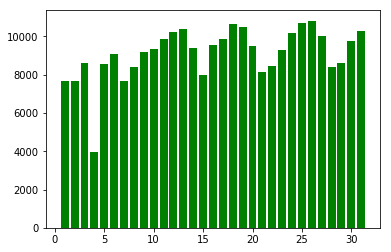

In [14]:

plt.bar(list(JanDaily.keys()),list(JanDaily.values()),color='g')
plt.show()

In [15]:
JanDaily

{1: 7651,
 2: 7682,
 3: 8612,
 4: 3942,
 5: 8555,
 6: 9072,
 7: 7657,
 8: 8380,
 9: 9182,
 10: 9366,
 11: 9838,
 12: 10246,
 13: 10383,
 14: 9385,
 15: 7964,
 16: 9539,
 17: 9839,
 18: 10668,
 19: 10503,
 20: 9500,
 21: 8135,
 22: 8440,
 23: 9275,
 24: 10179,
 25: 10706,
 26: 10818,
 27: 9999,
 28: 8380,
 29: 8600,
 30: 9769,
 31: 10299}

In [16]:
del JanDF

In [17]:
FebDF=data_aggregator(FebData,[1],100)

In [18]:
FebDailyList=[0 for x in range(28)]
FebDaily=dict.fromkeys([i for i in range (1,29)], 0)


In [19]:
FebDaily

{1: 0,
 2: 0,
 3: 0,
 4: 0,
 5: 0,
 6: 0,
 7: 0,
 8: 0,
 9: 0,
 10: 0,
 11: 0,
 12: 0,
 13: 0,
 14: 0,
 15: 0,
 16: 0,
 17: 0,
 18: 0,
 19: 0,
 20: 0,
 21: 0,
 22: 0,
 23: 0,
 24: 0,
 25: 0,
 26: 0,
 27: 0,
 28: 0}

In [20]:
for i in range (len(FebDF)):
    day=FebDF['tpep_pickup_datetime'][i].split(' ')[0].split('-')[2]
    for j in FebDaily:
        if day=='0'+str(j) or day==str(j):
            FebDaily[j]+=1

In [21]:
for i in FebDaily.keys():
    FebDaily[i]=int(FebDaily[i]/28)

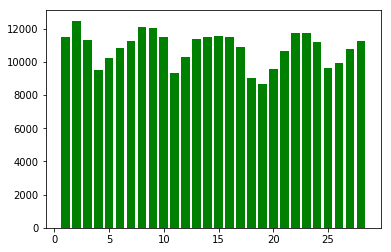

In [22]:

plt.bar(list(FebDaily.keys()),list(FebDaily.values()),color='g')
plt.show()

In [23]:
del FebDF

In [24]:
MarDF=data_aggregator(MarData,[1],100)

In [25]:
MarDailyList=[0 for x in range(31)]
MarDaily=dict.fromkeys([i for i in range (1,32)], 0)

In [26]:
for i in range (len(MarDF)):
    day=MarDF['tpep_pickup_datetime'][i].split(' ')[0].split('-')[2]
    for j in MarDaily:
        if day=='0'+str(j) or day==str(j):
            MarDaily[j]+=1


In [28]:
for i in MarDaily.keys():
    MarDaily[i]=int(MarDaily[i]/31)

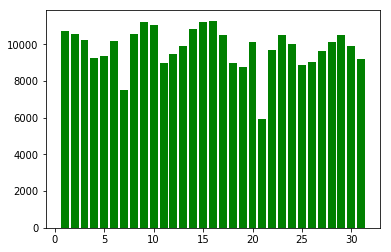

In [29]:

plt.bar(list(MarDaily.keys()),list(MarDaily.values()),color='g')
plt.show()

In [30]:
del MarDF

In [31]:
AprDF=data_aggregator(AprData,[1],100)

In [32]:
AprDailyList=[0 for x in range(30)]
AprDaily=dict.fromkeys([i for i in range (1,31)], 0)

In [33]:
for i in range (len(AprDF)):
    day=AprDF['tpep_pickup_datetime'][i].split(' ')[0].split('-')[2]
    for j in AprDaily:
        if day=='0'+str(j) or day==str(j):
            AprDaily[j]+=1

In [34]:
for i in AprDaily.keys():
    AprDaily[i]=int(AprDaily[i]/30)

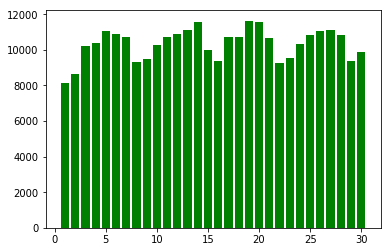

In [35]:
plt.bar(list(AprDaily.keys()),list(AprDaily.values()),color='g')
plt.show()

In [36]:
MayDF=data_aggregator(MarData,[1],100)

In [37]:
MayDailyList=[0 for x in range(31)]
MayDaily=dict.fromkeys([i for i in range (1,32)], 0)

In [38]:
for i in range (len(MayDF)):
    day=MayDF['tpep_pickup_datetime'][i].split(' ')[0].split('-')[2]
    for j in MayDaily:
        if day=='0'+str(j) or day==str(j):
            MayDaily[j]+=1


In [39]:
for i in MayDaily.keys():
    MayDaily[i]=int(MayDaily[i]/31)

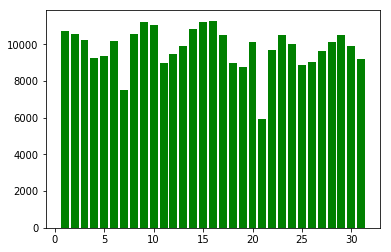

In [40]:
plt.bar(list(MayDaily.keys()),list(MayDaily.values()),color='g')
plt.show()

In [41]:
JunDF=data_aggregator(JunData,[1],100)

In [42]:
JunDailyList=[0 for x in range(30)]
JunDaily=dict.fromkeys([i for i in range (1,31)], 0)

In [43]:
for i in range (len(JunDF)):
    day=JunDF['tpep_pickup_datetime'][i].split(' ')[0].split('-')[2]
    for j in JunDaily:
        if day=='0'+str(j) or day==str(j):
            JunDaily[j]+=1


In [44]:
for i in JunDaily.keys():
    JunDaily[i]=int(JunDaily[i]/31)

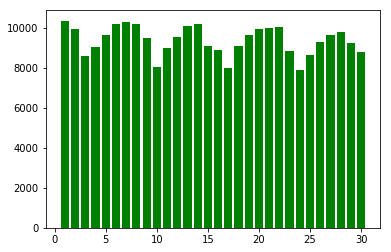

In [45]:
plt.bar(list(JunDaily.keys()),list(JunDaily.values()),color='g')
plt.show()

In [46]:
#RQ2 counting number of passengers for each time slot

In [47]:
JanDF=data_aggregator(JanData,[1,3],100)

In [50]:
timeslots={"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0}

In [52]:
for i in range(len(JanDF)):
    time=JanDF['tpep_pickup_datetime'][i].split(' ')[1]
    if time >'00:00:00' and time<'03:00:00':
        timeslots['0']+=JanDF['passenger_count'][i]
    if time >'03:00:00' and time<'06:00:00':
        timeslots['1']+=JanDF['passenger_count'][i]
    if time >'06:00:00' and time<'09:00:00':
        timeslots['2']+=JanDF['passenger_count'][i]
    if time >'09:00:00' and time<'12:00:00':
        timeslots['3']+=JanDF['passenger_count'][i]
    if time >'12:00:00' and time<'15:00:00':
        timeslots['4']+=JanDF['passenger_count'][i]
    if time >'15:00:00' and time<'18:00:00':
        timeslots['5']+=JanDF['passenger_count'][i]
    if time >'18:00:00' and time<'21:00:00':
        timeslots['6']+=JanDF['passenger_count'][i]
    if time >'21:00:00' and time<'23:00:00':
        timeslots['7']+=JanDF['passenger_count'][i]
    

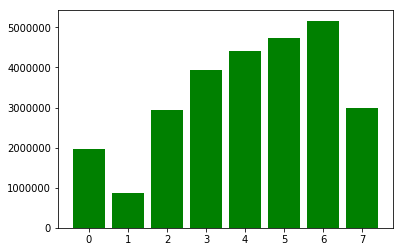

In [53]:
plt.bar(list(timeslots.keys()),list(timeslots.values()),color='g')
plt.show()

In [54]:
del JanDF

In [55]:
FebDF=data_aggregator(FebData,[1,3],100)

In [56]:
timeslotsF={"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0}

In [57]:
for i in range(len(FebDF)):
    time=FebDF['tpep_pickup_datetime'][i].split(' ')[1]
    if time >'00:00:00' and time<'03:00:00':
        timeslots['0']+=FebDF['passenger_count'][i]
    if time >'03:00:00' and time<'06:00:00':
        timeslots['1']+=FebDF['passenger_count'][i]
    if time >'06:00:00' and time<'09:00:00':
        timeslots['2']+=FebDF['passenger_count'][i]
    if time >'09:00:00' and time<'12:00:00':
        timeslots['3']+=FebDF['passenger_count'][i]
    if time >'12:00:00' and time<'15:00:00':
        timeslots['4']+=FebDF['passenger_count'][i]
    if time >'15:00:00' and time<'18:00:00':
        timeslots['5']+=FebDF['passenger_count'][i]
    if time >'18:00:00' and time<'21:00:00':
        timeslots['6']+=FebDF['passenger_count'][i]
    if time >'21:00:00' and time<'23:00:00':
        timeslots['7']+=FebDF['passenger_count'][i]

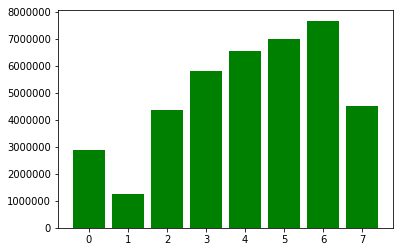

In [58]:
plt.bar(list(timeslots.keys()),list(timeslots.values()),color='g')
plt.show()

In [59]:
del FebDF

In [60]:
MarDF=data_aggregator(MarData,[1,3],100)

In [61]:
timeslotsM={"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0}

In [62]:
for i in range(len(MarDF)):
    time=MarDF['tpep_pickup_datetime'][i].split(' ')[1]
    if time >'00:00:00' and time<'03:00:00':
        timeslots['0']+=MarDF['passenger_count'][i]
    if time >'03:00:00' and time<'06:00:00':
        timeslots['1']+=MarDF['passenger_count'][i]
    if time >'06:00:00' and time<'09:00:00':
        timeslots['2']+=MarDF['passenger_count'][i]
    if time >'09:00:00' and time<'12:00:00':
        timeslots['3']+=MarDF['passenger_count'][i]
    if time >'12:00:00' and time<'15:00:00':
        timeslots['4']+=MarDF['passenger_count'][i]
    if time >'15:00:00' and time<'18:00:00':
        timeslots['5']+=MarDF['passenger_count'][i]
    if time >'18:00:00' and time<'21:00:00':
        timeslots['6']+=MarDF['passenger_count'][i]
    if time >'21:00:00' and time<'23:00:00':
        timeslots['7']+=MarDF['passenger_count'][i]

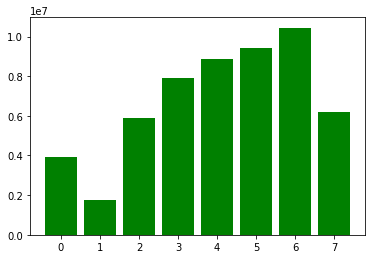

In [63]:
plt.bar(list(timeslots.keys()),list(timeslots.values()),color='g')
plt.show()

In [64]:
del MarDF

In [65]:
AprDF=data_aggregator(AprData,[1,3],100)

In [66]:
timeslotsA={"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0}

In [67]:
for i in range(len(AprDF)):
    time=AprDF['tpep_pickup_datetime'][i].split(' ')[1]
    if time >'00:00:00' and time<'03:00:00':
        timeslots['0']+=AprDF['passenger_count'][i]
    if time >'03:00:00' and time<'06:00:00':
        timeslots['1']+=AprDF['passenger_count'][i]
    if time >'06:00:00' and time<'09:00:00':
        timeslots['2']+=AprDF['passenger_count'][i]
    if time >'09:00:00' and time<'12:00:00':
        timeslots['3']+=AprDF['passenger_count'][i]
    if time >'12:00:00' and time<'15:00:00':
        timeslots['4']+=AprDF['passenger_count'][i]
    if time >'15:00:00' and time<'18:00:00':
        timeslots['5']+=AprDF['passenger_count'][i]
    if time >'18:00:00' and time<'21:00:00':
        timeslots['6']+=AprDF['passenger_count'][i]
    if time >'21:00:00' and time<'23:00:00':
        timeslots['7']+=AprDF['passenger_count'][i]

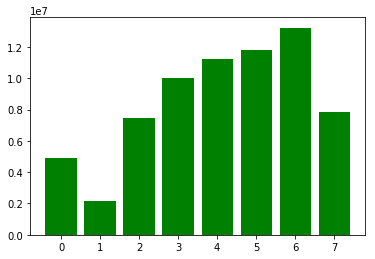

In [68]:
plt.bar(list(timeslots.keys()),list(timeslots.values()),color='g')
plt.show()

In [69]:
del AprDF

In [70]:
MayDF=data_aggregator(MayData,[1,3],100)

In [71]:
timeslotsMy={"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0}

In [72]:
for i in range(len(MayDF)):
    time=MayDF['tpep_pickup_datetime'][i].split(' ')[1]
    if time >'00:00:00' and time<'03:00:00':
        timeslots['0']+=MayDF['passenger_count'][i]
    if time >'03:00:00' and time<'06:00:00':
        timeslots['1']+=MayDF['passenger_count'][i]
    if time >'06:00:00' and time<'09:00:00':
        timeslots['2']+=MayDF['passenger_count'][i]
    if time >'09:00:00' and time<'12:00:00':
        timeslots['3']+=MayDF['passenger_count'][i]
    if time >'12:00:00' and time<'15:00:00':
        timeslots['4']+=MayDF['passenger_count'][i]
    if time >'15:00:00' and time<'18:00:00':
        timeslots['5']+=MayDF['passenger_count'][i]
    if time >'18:00:00' and time<'21:00:00':
        timeslots['6']+=MayDF['passenger_count'][i]
    if time >'21:00:00' and time<'23:00:00':
        timeslots['7']+=MayDF['passenger_count'][i]

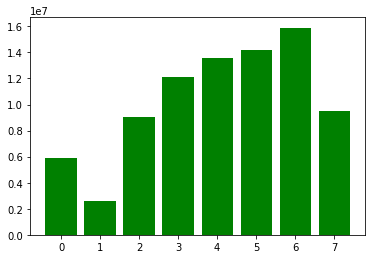

In [73]:
plt.bar(list(timeslots.keys()),list(timeslots.values()),color='g')
plt.show()

In [74]:
del MayDF

In [75]:
JunDF=data_aggregator(JunData,[1,3],100)

In [76]:
timeslotsJe={"0":0,"1":0,"2":0,"3":0,"4":0,"5":0,"6":0,"7":0}

In [77]:
for i in range(len(JunDF)):
    time=JunDF['tpep_pickup_datetime'][i].split(' ')[1]
    if time >'00:00:00' and time<'03:00:00':
        timeslots['0']+=JunDF['passenger_count'][i]
    if time >'03:00:00' and time<'06:00:00':
        timeslots['1']+=JunDF['passenger_count'][i]
    if time >'06:00:00' and time<'09:00:00':
        timeslots['2']+=JunDF['passenger_count'][i]
    if time >'09:00:00' and time<'12:00:00':
        timeslots['3']+=JunDF['passenger_count'][i]
    if time >'12:00:00' and time<'15:00:00':
        timeslots['4']+=JunDF['passenger_count'][i]
    if time >'15:00:00' and time<'18:00:00':
        timeslots['5']+=JunDF['passenger_count'][i]
    if time >'18:00:00' and time<'21:00:00':
        timeslots['6']+=JunDF['passenger_count'][i]
    if time >'21:00:00' and time<'23:00:00':
        timeslots['7']+=JunDF['passenger_count'][i]

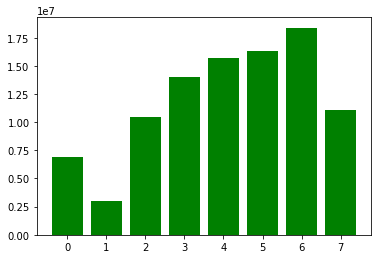

In [78]:
plt.bar(list(timeslots.keys()),list(timeslots.values()),color='g')
plt.show()

In [79]:
del JunDF